## Sentiment Analysis - Twitter data - Machine Learning approach

```
Dowmloading twitter data labeled by sentiment. 
"tweet_file" contains manually labeled sentiments 
```

In [38]:
from io import BytesIO, StringIO
from zipfile import ZipFile
import urllib.request

url = urllib.request.urlopen('http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip')
zipfile = ZipFile(BytesIO(url.read()))
tweet_file = zipfile.open('testdata.manual.2009.06.14.csv')

```
Data file format has 6 fields:
0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
1 - the id of the tweet (2087)
2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)
3 - the query (lyx). If there is no query, then this value is NO_QUERY.
4 - the user that tweeted (robotickilldozr)
5 - the text of the tweet (Lyx is cool)
```

In [39]:
import pandas as pd
tweets = pd.read_csv(tweet_file,
                     header=None,
                     names=['polarity', 'id', 'date',
                            'query', 'user', 'text'])

In [40]:
tweets.head()

,polarity,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [41]:
tweets.tail()

,polarity,id,date,query,user,text
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."
497,0,14076,Sun Jun 14 21:36:17 UTC 2009,iran,captain_pete,Reading the tweets coming out of Iran... The w...


In [42]:
print('read %d tweets' % len(tweets))

read 498 tweets


Look at the sentiment distribution across 498 tweets

Text(0,0.5,'number of tweets')

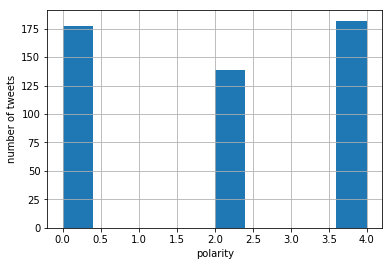

In [43]:
import matplotlib.pyplot as plt
tweets['polarity'].hist()
plt.xlabel('polarity')
plt.ylabel('number of tweets')

Creating label vector y

In [44]:
import numpy as np
from collections import Counter
y = np.array(tweets['polarity'])
y[:10]

array([4, 4, 4, 4, 4, 4, 0, 4, 4, 4], dtype=int64)

```
Creating feature vector X
Vectorizer stores the number of times each term occurs in each tweet
```

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, ngram_range = (1,1))
#vectorizer
#type(vectorizer)
X = vectorizer.fit_transform(tweets['text'])
print('vectorized %d tweets. found %d terms' % (x.shape[0], x.shape[1]))

vectorized 498 tweets. found 2264 terms


In [46]:
X

<498x2264 sparse matrix of type '<class 'numpy.int64'>'
	with 6422 stored elements in Compressed Sparse Row format>

In [47]:
xone = vectorizer.transform(['you you like kindle'])
print(xone.indices)
print(xone.data)

[1118 1170 2251]
[1 1 2]


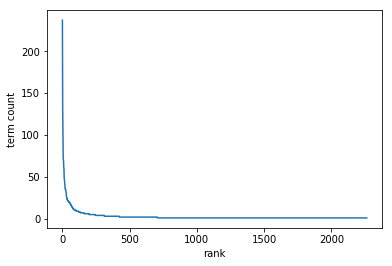

In [48]:
plt.plot(sorted(X.sum(axis=0).A1, reverse=True))
plt.xlabel('rank')
plt.ylabel('term count')
Counter(X.sum(axis=0).A1).most_common(10)
plt.show()

In [49]:
X

<498x2264 sparse matrix of type '<class 'numpy.int64'>'
	with 6422 stored elements in Compressed Sparse Row format>

In [50]:
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
vocab = np.array(vectorizer.get_feature_names())
vocab[:20]

array(['00', '000', '04fo', '10', '100', '1000', '12', '13t7nr', '15mp',
       '16', '16209', '16szl1', '17', '1796', '1988', '19epah', '19j2d',
       '1aikhf', '1st', '1zlff'], dtype='<U40')

Get the 10 most frequent words

In [57]:
col_sums = X.sum(axis=0)
col_sums

matrix([[1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [58]:
col_sums = X.sum(axis=0).A1
col_sums

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
col_sums = X.sum(axis=0).A1
top_indices = np.argsort(col_sums)[::-1][:10]
print('top_indices=', top_indices)

top_indices= [1961 1998  988 1060  152  209 1062  790 1337 1416]


Now that we have the indices, let us map them to terms

In [63]:
top_terms = vocab[top_indices]
top_terms

array(['the', 'to', 'http', 'is', 'and', 'at', 'it', 'for', 'my', 'of'],
      dtype='<U40')

Now, get the counts for top 10 terms

In [64]:
top_term_counts = col_sums[top_indices]
[x for x in zip(top_terms, top_term_counts)]

[('the', 237),
 ('to', 147),
 ('http', 130),
 ('is', 115),
 ('and', 91),
 ('at', 82),
 ('it', 72),
 ('for', 71),
 ('my', 70),
 ('of', 63)]

Fitting a Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs', multi_class='ovr')
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Computing the accuracy of the fit

In [69]:
def accuracy(truth, predicted):
    return len(np.where(truth == predicted)[0]) /len(truth)

predicted = model.predict(X)
print("accuracy on training data = %.3f" % accuracy(y, predicted))

accuracy on training data = 0.996


To determine which features are more important than the others - get the top weighted features

In [70]:
coef = model.coef_[2]
coef

array([-0.11409703, -0.04457022, -0.04279262, ...,  0.26156986,
       -0.133103  ,  0.17903549])

In [71]:
coef = model.coef_[2]
top_coef_ind = np.argsort(coef)[::-1][:10]
top_coef_ind

array([ 224, 1207,  834,  866, 1119, 1154,  884, 1258, 2007, 2105],
      dtype=int64)

Now, getting the terms of those indices

In [72]:
top_coef_terms = vocab[top_coef_ind]
top_coef = coef[top_coef_ind]
print('top weighted terms for positive class:')
[x for x in zip(top_coef_terms, top_coef)]

top weighted terms for positive class:


[('awesome', 1.528175570862097),
 ('love', 1.5163289431882283),
 ('g2', 1.2382089684556272),
 ('good', 1.1882448174828462),
 ('kindle2', 1.0477686731023124),
 ('lebron', 0.9737877766688814),
 ('great', 0.890003106982709),
 ('mcdonalds', 0.8272617030354312),
 ('tonight', 0.8170058096926999),
 ('very', 0.8097362653607058)]

In [73]:
coef = model.coef_[0]
top_coef_ind = np.argsort(coef)[::-1][:10]
top_coef_terms = vocab[top_coef_ind]
top_coef = coef[top_coef_ind]
print('top weighted terms for negative class:')
[x for x in zip(top_coef_terms, top_coef)]

top weighted terms for negative class:


[('warner', 1.5773217702700777),
 ('hate', 1.308404624770379),
 ('aig', 1.2972216402783563),
 ('gm', 1.1062070382936735),
 ('korea', 1.0712407794067091),
 ('north', 1.0712407794067091),
 ('not', 1.0676636120249743),
 ('cheney', 0.9402771005803825),
 ('itchy', 0.9117966529709591),
 ('fail', 0.9091864758669174)]

In [75]:
from sklearn.model_selection import KFold

def do_cross_validation(model, X, y, n_folds):
    cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    accuracies = []
    for train_ind, test_ind in cv.split(X):
        model.fit(X[train_ind], y[train_ind])
        predictions = model.predict(X[test_ind])
        accuracies.append(accuracy(y[test_ind], predictions))
    print('Average 5-fold cross validation accuracy=%.2f (std=%.2f)' %
            (np.mean(accuracies), np.std(accuracies)))
    
do_cross_validation(LogisticRegression(solver='lbfgs', multi_class='ovr'),
                    X, y, 5)

Average 5-fold cross validation accuracy=0.68 (std=0.05)


In [76]:
from sklearn.neighbors import KNeighborsClassifier

for i in range (1,11):
    print('\n%d neighbors' % i)
    do_cross_validation(KNeighborsClassifier(n_neighbors=i), X, y, 5)


1 neighbors
Average 5-fold cross validation accuracy=0.50 (std=0.04)

2 neighbors
Average 5-fold cross validation accuracy=0.48 (std=0.02)

3 neighbors
Average 5-fold cross validation accuracy=0.45 (std=0.04)

4 neighbors
Average 5-fold cross validation accuracy=0.50 (std=0.03)

5 neighbors
Average 5-fold cross validation accuracy=0.49 (std=0.03)

6 neighbors
Average 5-fold cross validation accuracy=0.53 (std=0.02)

7 neighbors
Average 5-fold cross validation accuracy=0.48 (std=0.05)

8 neighbors
Average 5-fold cross validation accuracy=0.47 (std=0.05)

9 neighbors
Average 5-fold cross validation accuracy=0.50 (std=0.03)

10 neighbors
Average 5-fold cross validation accuracy=0.50 (std=0.04)


In [77]:
Counter(y)[4] / len(y)

0.3654618473895582